<a href="https://colab.research.google.com/github/newpiggy/CS-512-Final-Project/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
import torchvision.transforms as tt
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split,ConcatDataset

%matplotlib inline

In [4]:
from PIL import Image
import torchvision.transforms as transforms

train_transform = transforms.Compose([transforms.Resize(256),
                        transforms.CenterCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [5]:
train_data = CIFAR100(download=True,root="./data",transform=train_transform)
test_data = CIFAR100(root="./data",train=False,transform=test_transform)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data


In [6]:
for image,label in train_data:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break

Image shape:  torch.Size([3, 224, 224])
Image tensor:  tensor([[[ 2.2489,  2.2489,  2.2489,  ...,  0.9303,  0.8789,  0.8447],
         [ 2.2489,  2.2489,  2.2489,  ...,  0.9646,  0.9132,  0.8789],
         [ 2.2489,  2.2489,  2.2489,  ...,  0.9988,  0.9474,  0.9132],
         ...,
         [ 0.2453,  0.2453,  0.2282,  ..., -1.4843, -1.3987, -1.3130],
         [ 0.1939,  0.2111,  0.1939,  ..., -1.4843, -1.3987, -1.2959],
         [ 0.1597,  0.1768,  0.1597,  ..., -1.4843, -1.3815, -1.2788]],

        [[ 2.4286,  2.4286,  2.4286,  ...,  1.2206,  1.1856,  1.1681],
         [ 2.4286,  2.4286,  2.4286,  ...,  1.2731,  1.2206,  1.2031],
         [ 2.4286,  2.4286,  2.4286,  ...,  1.3081,  1.2731,  1.2381],
         ...,
         [ 1.0455,  1.0455,  1.0455,  ..., -1.5630, -1.4405, -1.3179],
         [ 0.9930,  0.9930,  0.9930,  ..., -1.5455, -1.4055, -1.2654],
         [ 0.9405,  0.9405,  0.9580,  ..., -1.5280, -1.3704, -1.2304]],

        [[ 2.6400,  2.6400,  2.6400,  ...,  0.8971,  0.8274, 

In [7]:
BATCH_SIZE=128
train_dl = DataLoader(train_data,BATCH_SIZE,num_workers=4,pin_memory=True,shuffle=True)
test_dl = DataLoader(test_data,BATCH_SIZE,num_workers=4,pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


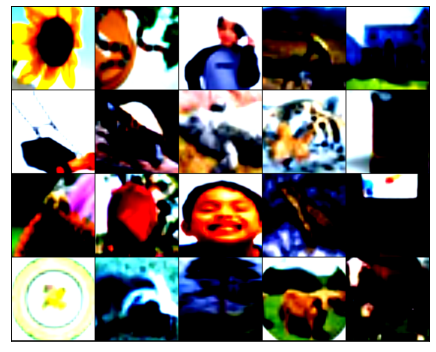

In [8]:
def show_batch(dl):
    for batch in dl:
        images,labels = batch
        fig, ax = plt.subplots(figsize=(7.5,7.5))
        ax.set_yticks([])
        ax.set_xticks([])
        ax.imshow(make_grid(images[:20],nrow=5).permute(1,2,0))
        break
show_batch(train_dl)